In [1]:
# -------------------------------------------------------------------------------------------------------------------
# Course name - Exploratory data analysis
# Course code - DSC530
# Week 10 assignment
# Script name - Shekhar530Week10.ipynb
# Creator - Manish Shekhar
# Date created - Feb 13th - Feb 17th 2023
# -------------------------------------------------------------------------------------------------------------------

### Exercise 12-1: 

### The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3. 

### Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [29]:
# import required libraries
import numpy as np
import pandas as pd
import random

import thinkstats2
import thinkplot
import statsmodels
import statsmodels.formula.api as smf

In [5]:
# Reading the Cababis sales transactions data file into a pandas data frame
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])

In [7]:
# See the data structure
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [16]:
# Many methods used to analyze time series require the measurements to be equally spaced, or at least things are simpler if they are.
# Creating a function that groups the data by time to make the measurement equally spaced.


# The result, grouped, is a map from each date to a DataFrame that contains prices reported on that date.
# aggregate is a GroupBy method that iterates through the groups and applies a function to each column of the
# group; in this case there is only one column, ppg. So the result of aggregate is a DataFrame with one row for each date and one column, ppg.

def GroupByDay(transactions, func=np.mean):
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

# groupby is a DataFrame method that returns a GroupBy object, groups; used in a for loop, it iterates the names of the groups and the DataFrames
# that represent them. Since the values of quality are low, medium, and high, we get three groups with those names.
# The loop iterates through the groups and calls GroupByDay, which computes the daily average price and returns a new DataFrame:

def GroupByQualityAndDay(transactions):
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies


# The resulting DataFrame has columns ppg, date, and years.
daily = GroupByDay(transactions)
dailies = GroupByQualityAndDay(transactions)

In [18]:
# Check the daily and dailies data
daily.head()

,ppg,date,years
date,,,
2010-09-02,11.727733,2010-09-02,0.000000
2010-09-03,11.972892,2010-09-03,0.002738
2010-09-04,13.752500,2010-09-04,0.005476
2010-09-05,15.113333,2010-09-05,0.008214
2010-09-06,15.537500,2010-09-06,0.010952


In [20]:
# check the dailies data 
print(dailies)

{'high':                   ppg       date     years
date                                      
2010-09-02  13.384186 2010-09-02  0.000000
2010-09-03  14.459588 2010-09-03  0.002738
2010-09-04  14.923333 2010-09-04  0.005476
2010-09-05  16.667500 2010-09-05  0.008214
2010-09-06  15.537500 2010-09-06  0.010952
...               ...        ...       ...
2014-05-09  11.468298 2014-05-09  3.682485
2014-05-10  10.532326 2014-05-10  3.685223
2014-05-11  11.518750 2014-05-11  3.687961
2014-05-12  10.578293 2014-05-12  3.690699
2014-05-13   9.604615 2014-05-13  3.693437

[1241 rows x 3 columns], 'low':                   ppg       date     years
date                                      
2010-09-02   4.943750 2010-09-02  0.000000
2010-09-03   3.984138 2010-09-03  0.002738
2010-09-04   3.530000 2010-09-04  0.005476
2010-09-10   4.240000 2010-09-10  0.021903
2010-09-14   6.066118 2010-09-14  0.032855
...               ...        ...       ...
2014-05-09  14.700000 2014-05-09  3.682485
2014-05-10  

In [44]:
# Creating the linear regression model that tries to predict ppg by using year
# The following function takes a DataFrame of daily prices and computes a least squares fit, returning the model and results
# objects from StatsModels:

# Separating formula out to even pass the quadratic equation later
formula = 'ppg ~ years'

def RunLinearModel(daily):
    model = smf.ols(formula, data=daily)
    results = model.fit()
    return model, results

In [38]:
# Then we can iterate through the qualities and fit a model to each:
from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Tue, 14 Feb 2023   Prob (F-statistic):          3.69e-160
Time:                        23:47:34   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7082      0.023    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           2.76e-09
Time:                        23:47:34   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5683      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.82e-15
Time:                        23:47:34   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2832      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Plot the fitted model with the data
def PlotFittedValues(model, results, label=""):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:, 1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label="model", color="#ff7f00")

In [40]:
# Plot the original data and the fitted curve
def PlotLinearModel(daily, name):
    """Plots a linear fit to a sequence of prices, and the residuals.

    daily: DataFrame of daily prices
    name: string
    """
    model, results = RunLinearModel(daily)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(
        title="Fitted values",
        xlabel="Years",
        xlim=[-0.1, 3.8],
        ylabel="Price per gram ($)",
    )

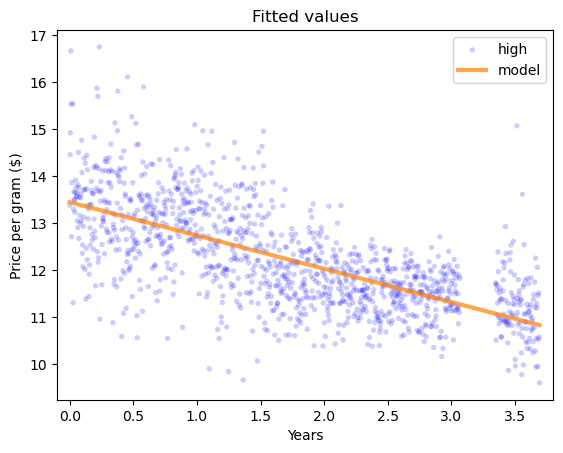

In [41]:
# Below is the results for high quality category
name = "high"
daily = dailies[name]

PlotLinearModel(daily, name)

In [49]:
# Re-creating the linear model with introducing year^2 i.e. using a quadratic function to model the regression
daily['years2'] = daily.years**2
formula = 'ppg ~ years + years2'

daily.head()

,ppg,date,years,years2
date,,,,
2010-09-02,11.02125,2010-09-02,0.000000,0.000000
2010-09-03,8.05500,2010-09-03,0.002738,0.000007
2010-09-04,16.95000,2010-09-04,0.005476,0.000030
2010-09-05,12.00500,2010-09-05,0.008214,0.000067
2010-09-08,16.25000,2010-09-08,0.016427,0.000270


In [51]:
# RunLinearModel using qudratic formula is called for each quality in dailies dataset

# Then we can iterate through the qualities and fit a model to each:
from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          4.57e-164
Time:                        00:00:53   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     22.86
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.83e-10
Time:                        00:00:53   Log-Likelihood:                -3086.5
No. Observations:                1179   AIC:                             6179.
Df Residuals:                    1176   BIC:                             6194.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7050      0.287     16.393      0.000       4.142       5.268
years          1.6329      0.357      4.573      0.000       0.932       2.334
years2        -0.2937      0.095     -3.091      0.002      -0.480      -0.107
==============================================================================
Omnibus:                      661.159   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6718.787
Skew:                           2.415   Prob(JB):                         0.00
Kurtosis:                      13.651   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     57.33
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           1.55e-24
Time:                        00:00:53   Log-Likelihood:                -2030.6
No. Observations:                1238   AIC:                             4067.
Df Residuals:                    1235   BIC:                             4083.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3509      0.104     80.512      0.000       8.147       8.554
years          1.1472      0.130      8.806      0.000       0.892       1.403
years2        -0.2386      0.035     -6.878      0.000      -0.307      -0.171
==============================================================================
Omnibus:                      194.417   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1123.295
Skew:                           0.585   Prob(JB):                    1.20e-244
Kurtosis:                       7.517   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
#### R squared for each model i.e. for high, low, and medium is higher of quadratic function based model when compared to simple regression model
#### Below is the comparison

##### 		High	Low	Medium
##### Simple Linear Regression	R squared	0.444	0.030	0.050
##### Linear regression with quadratic function	R Squared	0.455	0.037	0.085

##### P-values in both the models are highly statistically significant

In [56]:
# The simplest way to generate predictions is to use statsmodels to fit a model to the data, then use the predict method from the results.
def GenerateSimplePrediction(results, years):
    """Generates a simple prediction.

    results: results object
    years: sequence of times (in years) to make predictions for

    returns: sequence of predicted values
    """
    n = len(years)
    inter = np.ones(n)
    d = dict(Intercept=inter, years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    predict = results.predict(predict_df)
    return predict

In [58]:
def PlotSimplePrediction(results, years):
    predict = GenerateSimplePrediction(results, years)

    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label=name)
    thinkplot.plot(years, predict, color="#ff7f00")
    xlim = years[0] - 0.1, years[-1] + 0.1
    thinkplot.Config(
        title="Predictions",
        xlabel="Years",
        xlim=xlim,
        ylabel="Price per gram ($)",
        loc="upper right",
    )

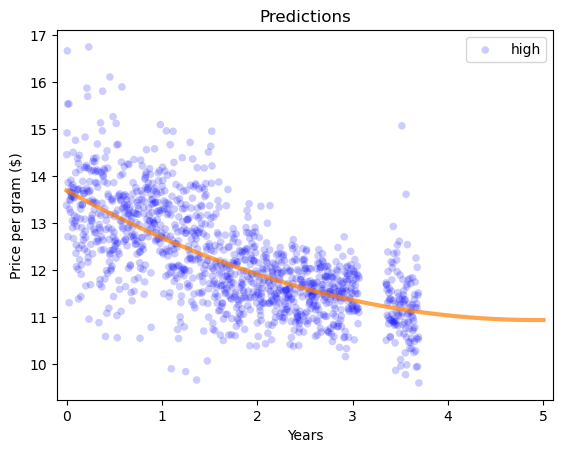

In [91]:
# Here's what the prediction looks like for the high quality category, using the linear model.
name = "high"
daily = dailies[name]

_, results = RunLinearModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

In [94]:
# To visualize predictions, I show a darker region that quantifies modeling uncertainty and a 
# lighter region that quantifies predictive uncertainty.
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color="gray")

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color="gray")

In [97]:
# When we generate predictions, we want to quatify the uncertainty in the prediction.  We can do that by resampling.  
# The following function fits a model to the data, computes residuals, then resamples from the residuals to general fake datasets.  
# It fits the same model to each fake dataset and returns a list of results.

def SimulateResults(daily, iters=101, func=RunLinearModel):
    """Run simulations based on resampling residuals.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()

    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

In [98]:
# To generate predictions, we take the list of results fitted to resampled data.  
# For each model, we use the `predict` method to generate predictions, and return a sequence of predictions.
# If `add_resid` is true, we add resampled residuals to the predicted values, which generates predictions that include predictive 
# uncertainty (due to random noise) as well as modeling uncertainty (due to random sampling).

def GeneratePredictions(result_seq, years, add_resid=False):
    """Generates an array of predicted values from a list of model results.

    When add_resid is False, predictions represent sampling error only.

    When add_resid is True, they also include residual error (which is
    more relevant to prediction).

    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean, whether to add in resampled residuals

    returns: sequence of predictions
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)

    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

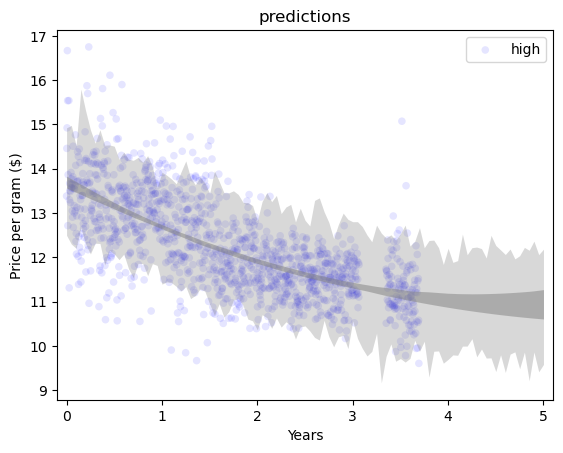

In [99]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunLinearModel)
thinkplot.Config(
    title="predictions",
    xlabel="Years",
    xlim=[years[0] - 0.1, years[-1] + 0.1],
    ylabel="Price per gram ($)",
)

### Exercise 12-2: 

### Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from HypothesisTest. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation. 

### Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [80]:
# The following function computes serial correlation with the given lag
def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [69]:
# Using resampling to generate missing values with right amount of noise
def FillMissing(daily, span=30):
    """Fills missing values with an exponentially weighted moving average.

    Resulting DataFrame has new columns 'ewma' and 'resid'.

    daily: DataFrame of daily prices
    span: window size (sort of) passed to ewma

    returns: new DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    ewma = pd.Series(reindexed.ppg).ewm(span=span).mean()

    resid = (reindexed.ppg - ewma).dropna()
    fake_data = ewma + thinkstats2.Resample(resid, len(reindexed))
    reindexed.ppg.fillna(fake_data, inplace=True)

    reindexed["ewma"] = ewma
    reindexed["resid"] = reindexed.ppg - ewma
    return reindexed

In [77]:
# Before computing correlation lets fill missing values
filled_dailies = {}
for name, daily in dailies.items():
    filled_dailies[name] = FillMissing(daily, span=30)

In [81]:
# Creating class SerialCorrelationTest extending thinkstats2.HypothesisTest
class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [82]:
# test the correlation between consecutive prices

name = "high"
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.4852293761947381 0.0


In [85]:
# test for serial correlation in residuals of the linear model

formula = 'ppg ~ years'
_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.07570473767506261 0.006


In [88]:
# test for serial correlation in residuals of the quadratic model

formula = 'ppg ~ years + years2' # Passing the quadratic formula / function
_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.05607308161289916 0.043
